In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\chand\AppData\Local\Temp/ipykernel_14424/3906923861.py:4: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[:,0][y[:,0]==1],x[:,1][y[:,0]==1],marker='+',c='blue',edgecolors='black')


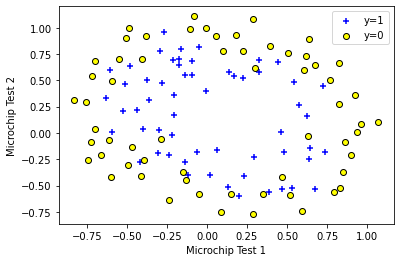

In [375]:
data = pd.read_csv('ex2data2.txt').to_numpy()
x = data[:,:-1]
y = data[:,-1].reshape((-1,1))
plt.scatter(x[:,0][y[:,0]==1],x[:,1][y[:,0]==1],marker='+',c='blue',edgecolors='black')
plt.scatter(x[:,0][y[:,0]==0],x[:,1][y[:,0]==0],marker='o',c='yellow',edgecolors='black')
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')
plt.legend(['y=1','y=0'],loc=1)

In [420]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))
    
def grad_cost(y_val, theta_val, x_val):
    count = y_val.shape[0]
    theta_size = np.size(theta)
    grad_cost_out = np.zeros(theta_size)
    h = sigmoid(theta_val.T @ x_val.T).T
    pos_cost = - y_val * np.log(h)
    neg_cost = (y_val-1) * np.log(1-h)
    err = h - y_val
    for i in range(theta_size):
        grad_cost_out[i] = np.sum(err * x_val[i,:])
    grad_cost_out = (grad_cost_out/count).reshape((-1,1))
    cost = pos_cost + neg_cost
    return h, cost, grad_cost_out/count

def predict(theta_val,val_1,val_2):
    res = theta_val.T @ x_arr(val_1,val_2).T
    return sigmoid(res).reshape((-1,1))

def x_arr(x1_val,x2_val):
    if type(x1_val) == int or type(x1_val) == np.float64 or type(x1_val) == float:
        x_a = 1
    else:
        if len(x1_val) != len(x2_val):
            return None
        x_a = [1]*len(x1_val)
    degree = 6
    for i in range(1,degree+1):
        for j in range(i+1):
            x_a = np.c_[x_a, (x1_val**(i-j))*(x2_val**j)]
    return x_a

In [422]:
h, costa, grad_costa = grad_cost(y,theta0,x_a)
predict_result = predict(theta0,x_a[:,0],x_a[:,1])
print(np.c_[costa, predict_result>0.5,y])

[[0.34194481 0.         1.        ]
 [0.36754816 0.         1.        ]
 [0.32151159 0.         1.        ]
 [0.43570484 0.         1.        ]
 [0.4747393  0.         1.        ]
 [0.40382115 0.         1.        ]
 [0.45772429 0.         1.        ]
 [0.45494113 0.         1.        ]
 [0.54413444 0.         1.        ]
 [0.62811343 0.         1.        ]
 [0.66013474 0.         1.        ]
 [0.54357219 0.         1.        ]
 [0.7321915  0.         1.        ]
 [0.47091266 0.         1.        ]
 [0.34709582 0.         1.        ]
 [0.26109773 0.         1.        ]
 [0.59666696 0.         1.        ]
 [0.36710096 0.         1.        ]
 [0.47911089 0.         1.        ]
 [0.65901379 0.         1.        ]
 [0.6343715  0.         1.        ]
 [0.71305547 0.         1.        ]
 [0.65607973 0.         1.        ]
 [0.5051721  0.         1.        ]
 [0.6681951  0.         1.        ]
 [0.62688603 0.         1.        ]
 [0.93007576 0.         1.        ]
 [0.25502721 0.         1.  

In [423]:
theta = np.array([[0.5]*28]).T
x_a = x_arr(x[:,0],x[:,1])

In [424]:
gradient = 1e-3
loop = 10000
for _ in range(loop):
    theta = theta - (gradient * grad_cost(y,theta,x_a)[2].T)

AttributeError: 'tuple' object has no attribute 'T'

C:\Users\chand\AppData\Local\Temp/ipykernel_14424/2507074380.py:15: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, val_map,levels=[0,.9])
C:\Users\chand\AppData\Local\Temp/ipykernel_14424/2507074380.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[:,0][y[:,0]==1],x[:,1][y[:,0]==1],marker='+',c='blue',edgecolors='black')


Text(0, 0.5, 'feature_y')

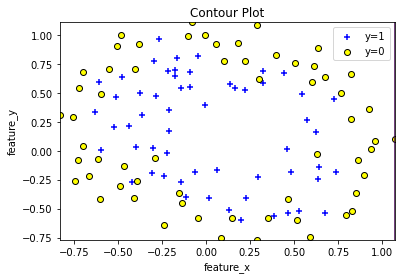

In [280]:
data_max = np.max(x,axis=0)
data_min = np.min(x,axis=0)
sizemat = 50
feature_x = np.linspace(data_min[0], data_max[0], sizemat)
feature_y = np.linspace(data_min[1], data_max[1], sizemat)
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)

val_map = X*0
for i in range(sizemat):
    for j in range(sizemat):
        val_map[i,j] = predict(theta,X[i][j],Y[j][j])
  
# plots contour lines
ax.contour(X, Y, val_map,levels=[0,.9])
plt.scatter(x[:,0][y[:,0]==1],x[:,1][y[:,0]==1],marker='+',c='blue',edgecolors='black')
plt.scatter(x[:,0][y[:,0]==0],x[:,1][y[:,0]==0],marker='o',c='yellow',edgecolors='black')
ax.legend(['y=1','y=0'],loc=1)
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

1 0
0 1
2 0
1 1
0 2
3 0
2 1
1 2
0 3
4 0
3 1
2 2
1 3
0 4
5 0
4 1
3 2
2 3
1 4
0 5
6 0
5 1
4 2
3 3
2 4
1 5
0 6

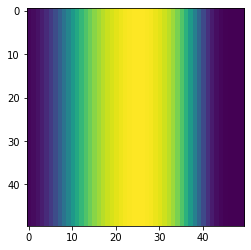

In [253]:
plt.imshow(val_map*255)

In [221]:
y.shape

(117, 1)

In [371]:
x_a[:,1:].shape

(117, 27)

In [373]:
import sklearn.linear_model
clf = sklearn.linear_model.LogisticRegression()
clf.fit(x_a[:,1:], y.reshape((-1,)))
w0 = clf.intercept_[0].reshape(1,)
thetax = clf.coef_.flatten()
theta0 = (np.r_[w0,thetax]).reshape((-1,1))

C:\Users\chand\AppData\Local\Temp/ipykernel_14424/4282603780.py:15: UserWarning: No contour levels were found within the data range.
  ax.contour(X, Y, val_map,levels=[0,.9])
C:\Users\chand\AppData\Local\Temp/ipykernel_14424/4282603780.py:16: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x[:,0][data[:,-1]==1],x[:,1][data[:,-1]==1],marker='+',c='blue',edgecolors='black')


Text(0, 0.5, 'feature_y')

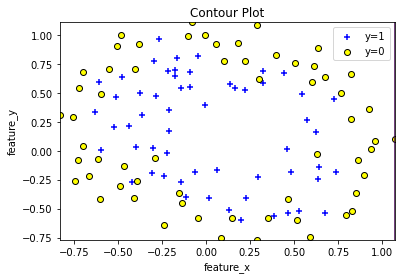

In [255]:
data_max = np.max(x,axis=0)
data_min = np.min(x,axis=0)
sizemat = 50
feature_x = np.linspace(data_min[0], data_max[0], sizemat)
feature_y = np.linspace(data_min[1], data_max[1], sizemat)
[X, Y] = np.meshgrid(feature_x, feature_y)
fig, ax = plt.subplots(1, 1)

val_map = X*0
for i in range(sizemat):
    for j in range(sizemat):
        val_map[i,j] = predict(theta0,X[i][j],Y[j][j])
  
# plots contour lines
ax.contour(X, Y, val_map,levels=[0,.9])
plt.scatter(x[:,0][data[:,-1]==1],x[:,1][data[:,-1]==1],marker='+',c='blue',edgecolors='black')
plt.scatter(x[:,0][data[:,-1]==0],x[:,1][data[:,-1]==0],marker='o',c='yellow',edgecolors='black')
ax.legend(['y=1','y=0'],loc=1)
ax.set_title('Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')